In [7]:
import pandas as pd
df = pd.read_csv('../data/server_temperature_data.csv')

# Check for missing values
print(df.isnull().sum())

# Remove rows where temperature is missing
df = df.dropna(subset=['CPU_Temperature'])

Timestamp            0
CPU_Usage            0
CPU_Frequency        0
Memory_Usage         0
Disk_Usage           0
Process_Count        0
Thread_Count         0
CPU_Temperature    327
GPU_Temperature    320
dtype: int64


In [8]:
# Fill gaps in Memory and Frequency with the average (mean)
df['Memory_Usage'] = df['Memory_Usage'].fillna(df['Memory_Usage'].mean())
df['CPU_Frequency'] = df['CPU_Frequency'].fillna(df['CPU_Frequency'].mean())

# Verify everything is now zero
print(df.isnull().sum())

Timestamp          0
CPU_Usage          0
CPU_Frequency      0
Memory_Usage       0
Disk_Usage         0
Process_Count      0
Thread_Count       0
CPU_Temperature    0
GPU_Temperature    0
dtype: int64


In [9]:
# Save the final cleaned version to your data folder
df.to_csv('../data/cleaned_server_data.csv', index=False)
print("SUCCESS: Cleaned data saved as 'cleaned_server_data.csv'!")

SUCCESS: Cleaned data saved as 'cleaned_server_data.csv'!


Matplotlib is building the font cache; this may take a moment.


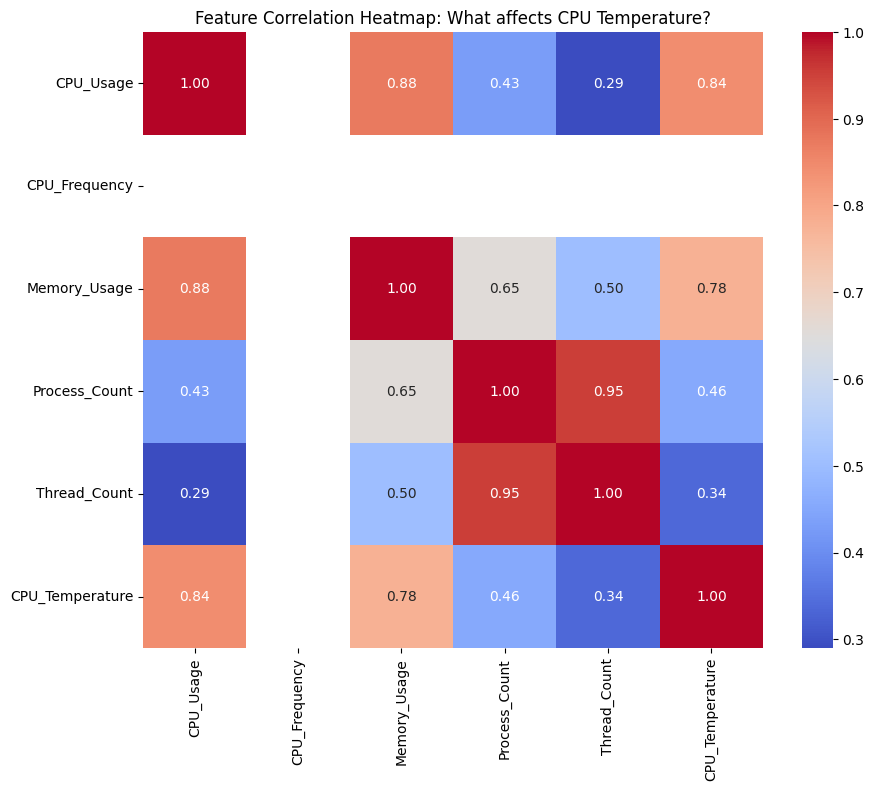

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the cleaned data you just created
df = pd.read_csv('../data/cleaned_server_data.csv')

# 2. Calculate the correlation matrix
# This looks for patterns between every column
correlation_matrix = df.corr()

# 3. Create the Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap: What affects CPU Temperature?')
plt.show()